In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("cust_data.xlsx")

In [3]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [5]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
df.shape

(30000, 38)

In [7]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [8]:
df["Gender"].unique()

array(['M', 'F', nan], dtype=object)

In [9]:
mode1=df["Gender"].mode().values[0]
df["Gender"]=df["Gender"].replace(np.nan,mode1)

In [10]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [11]:
df["Gender"]=df["Gender"].map({"M":0,"F":1})

In [12]:
df1=df.iloc[:,1:]
XScaled=df1.apply(zscore)

In [13]:
#sns.pairplot(XScaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

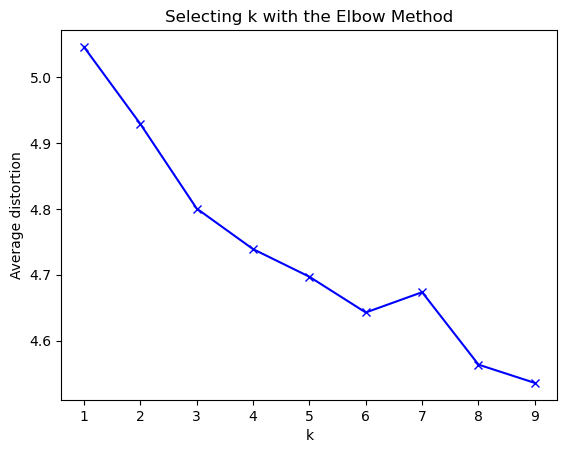

In [14]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    prediction=model.predict(XScaled)
    meanDistortions.append(sum(np.min(cdist(XScaled, model.cluster_centers_, 'euclidean'), axis=1)) / XScaled.shape[0])
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [15]:
final_model=KMeans(3)
final_model.fit(XScaled)
prediction=final_model.predict(XScaled)
#Append the prediction 
df["GROUP"] = prediction
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,GROUP
0,1,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


In [16]:
Clust = df.groupby(['GROUP'])
Clust.mean()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
GROUP,,,,,,,,,,,,,,,,,,,,,
0,15064.497128,1.000000,4.112871,0.206310,0.164931,0.196840,0.174850,0.144107,0.129881,0.106588,...,0.066601,0.231442,0.376941,0.113141,0.053406,0.038776,0.141011,0.092541,0.055516,0.035275
1,13780.826265,0.010358,4.292554,0.306430,0.450850,0.201094,0.010358,0.033613,0.085597,0.006840,...,0.031073,0.134649,0.067813,0.068399,0.040258,0.023451,0.158882,0.089115,0.057846,0.042799
2,16851.744329,0.939254,4.415994,0.714341,0.610534,0.489427,0.342561,0.354864,0.331027,0.306805,...,0.550942,0.879662,0.905805,0.729719,0.359093,0.282968,0.696271,0.374087,0.425990,0.431373


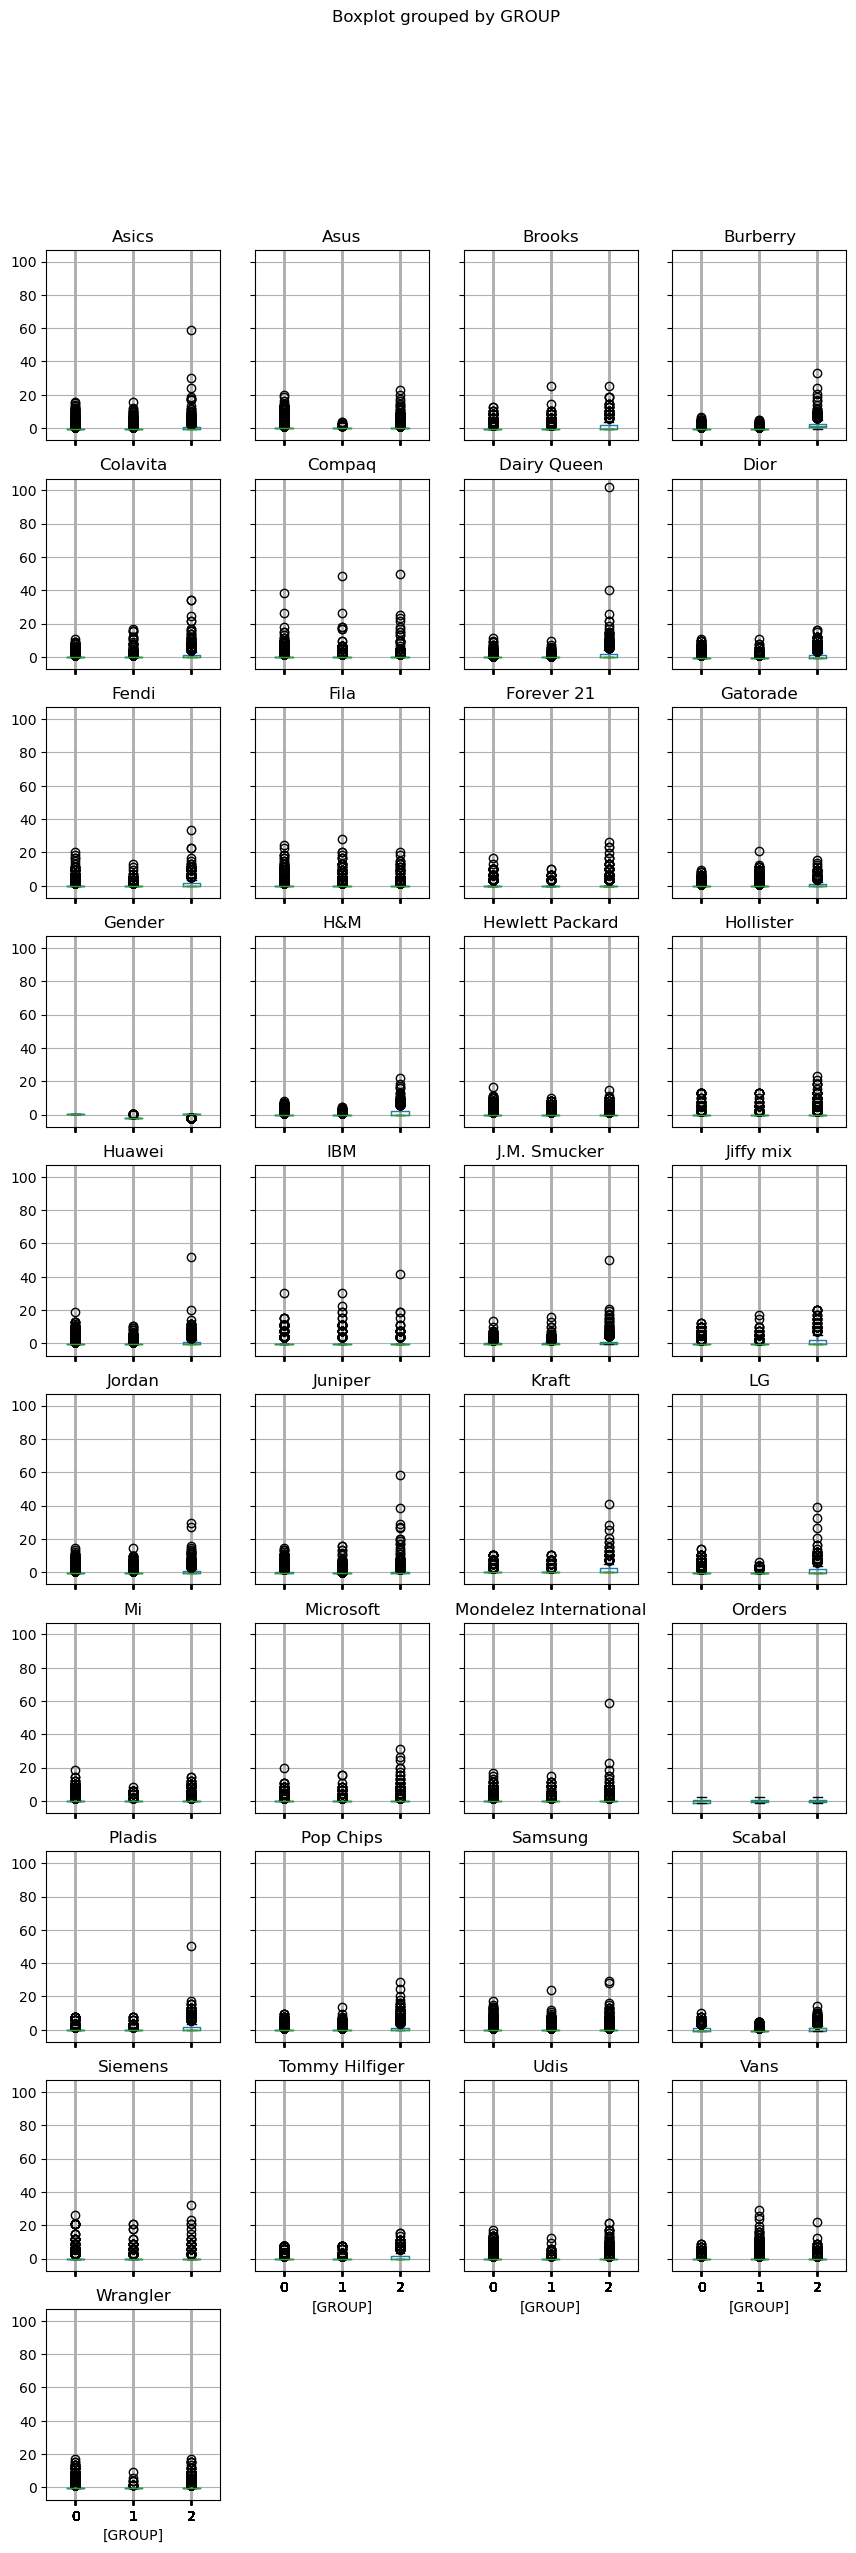

In [39]:
XScaled.boxplot(by='GROUP', layout = (10,4),figsize=(10,30))
plt.show()

In [40]:
final_model=KMeans(6)
final_model.fit(XScaled)
prediction=final_model.predict(XScaled)
#Append the prediction 
df["GROUP"] = prediction
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,GROUP
0,1,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
2,3,0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,4


In [41]:
Clust2= df.groupby(['GROUP'])
Clust2.mean()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
GROUP,,,,,,,,,,,,,,,,,,,,,
0,13758.391304,0.007482,4.291405,0.280081,0.439838,0.186047,0.007078,0.026289,0.084328,0.003640,...,0.031143,0.129019,0.066734,0.065723,0.017189,0.010516,0.152073,0.085137,0.053792,0.040040
1,14792.162551,1.000000,4.048650,0.122360,0.123253,0.131396,0.068299,0.060681,0.114007,0.037197,...,0.066828,0.209940,0.327099,0.108910,0.023537,0.015866,0.140958,0.088473,0.058001,0.038300
2,16681.525000,0.992188,4.240625,0.370312,0.460938,0.196875,0.217188,0.187500,0.162500,2.948437,...,0.145313,0.415625,0.720313,0.203125,0.123438,0.076563,0.160938,0.117188,0.073438,0.053125
3,17674.286353,0.909396,4.201342,0.334452,0.347875,0.276286,0.153244,0.227069,0.241611,0.178971,...,0.174497,0.631991,0.890380,0.370246,1.535794,1.212528,0.182327,0.136465,0.098434,0.063758
4,16190.032692,0.905769,4.341667,0.570513,0.559615,0.385256,0.233333,0.193590,0.305769,0.167949,...,0.708333,0.702564,0.614103,0.730769,0.132692,0.102564,0.969231,0.450641,0.630128,0.649359
5,16635.563375,0.972327,4.635463,0.984968,0.536385,0.783396,0.978818,0.818586,0.276392,0.059105,...,0.101127,0.537410,0.796379,0.263068,0.047147,0.024940,0.188931,0.166040,0.052272,0.032798


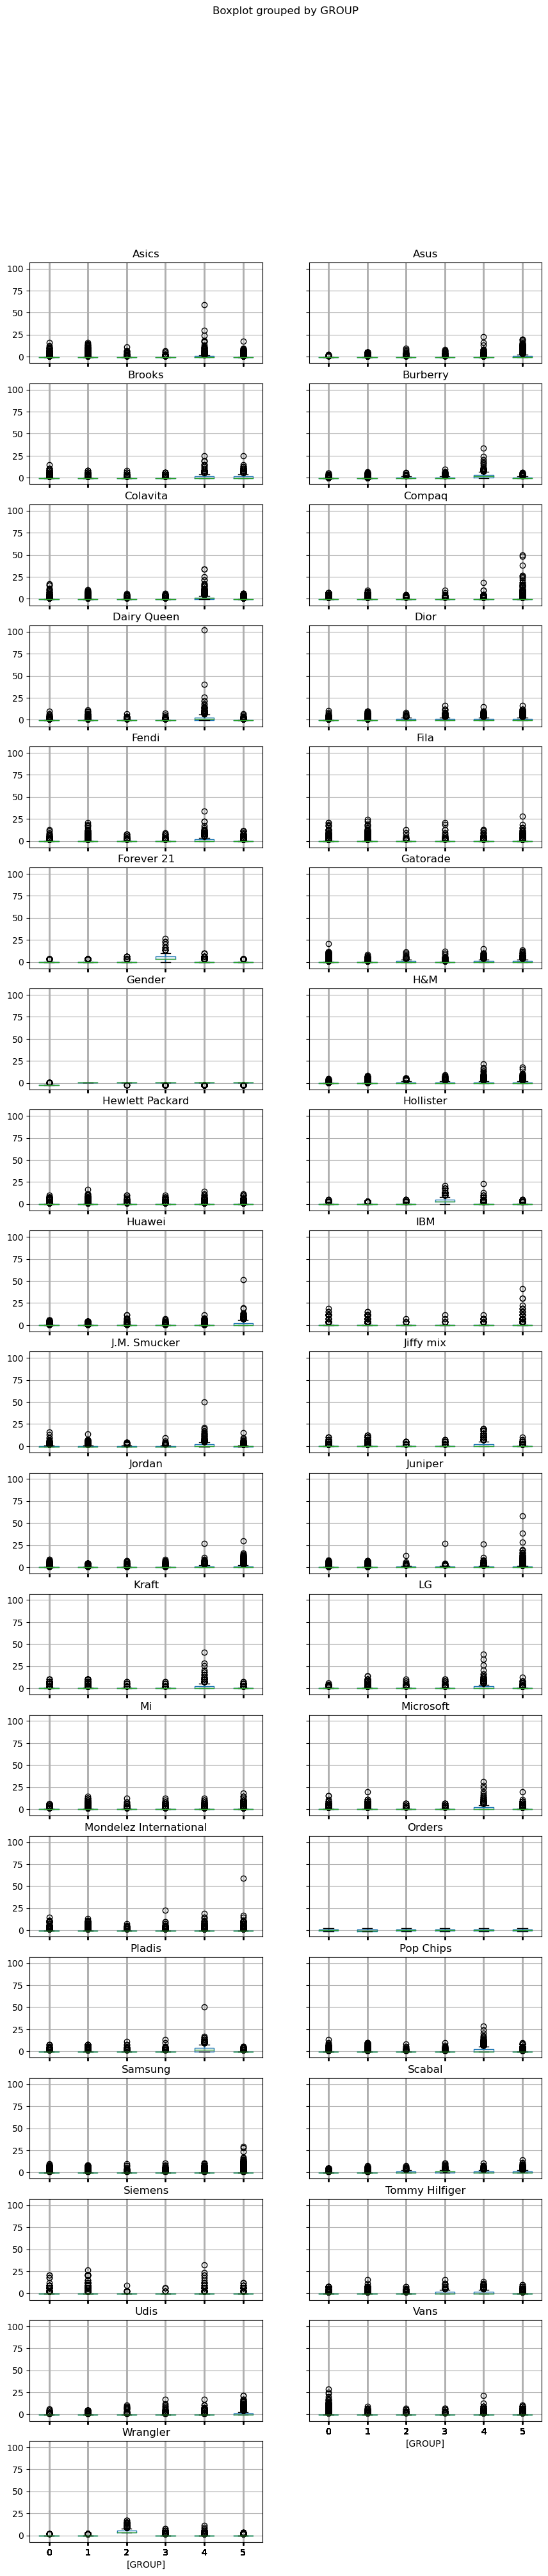

In [60]:
XScaled.boxplot(by='GROUP', layout = (20,2),figsize=(10,50))
plt.show()